# 1. 데이터 셋 다운로드 및 압축해제
- https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset?resource=download

In [ ]:
!unzip data/5celebrity.zip -d data/5celebrity

# 2. 얼굴 Detect

In [ ]:
# 얼굴인식(얼굴정보)-세로*가로*3 넘파이 -> 1*512(임베딩데이터로 변환) -> X, y를 머신러닝(SVM)
# ! pip install mtcnn

In [1]:
from mtcnn import MTCNN
import PIL
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 2.1 MTCNN을 이용해서 얼굴 형태 탐지

In [2]:
detector = MTCNN()
image = cv2.imread('data/5celebrity/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = detector.detect_faces(image)
result

[{'box': [14, 30, 76, 92],
  'confidence': 0.9998857975006104,
  'keypoints': {'nose': [36, 91],
   'mouth_right': [64, 98],
   'right_eye': [51, 63],
   'left_eye': [27, 75],
   'mouth_left': [44, 109]}}]

## 2.2 탐지한 얼굴 그려보기

In [3]:
box = result[0]['box'] # 왼쪽 위 부분의 x, y, width, height
keypoints = result[0]['keypoints'] # nose좌표, mouth_right좌표, right_eye좌표, left_eye좌표, mouth_left좌표
x, y, w, h = box
cv2.rectangle(image,
             (x, y),
             (x+w, y+h),
             (0,155,255),
              2)
cv2.circle(image, keypoints['nose'],2,(255,0,0),2)
cv2.circle(image, keypoints['mouth_right'],2,(255,0,0),2)
cv2.circle(image, keypoints['mouth_left'],2,(255,0,0),2)
cv2.circle(image, keypoints['right_eye'],2,(255,0,0),2)
cv2.circle(image, keypoints['left_eye'],2,(255,0,0),2)
cv2.imwrite('data/ben.jpg', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

face = image[y:y+h, x:x+w]
cv2.imwrite('data/benface.jpg', cv2.cvtColor(face, cv2.COLOR_RGB2BGR))

True

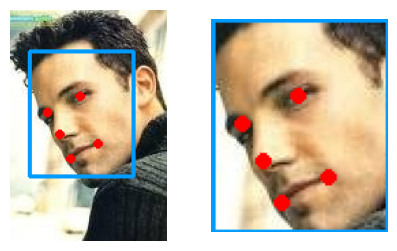

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
axes[0].imshow(image)
axes[0].axis('off')
axes[1].imshow(face)
axes[1].axis('off')
plt.show()

In [5]:
detector = MTCNN()
image = cv2.imread('data/5celebrity/train/elton_john/12.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = detector.detect_faces(image)
result

[{'box': [121, 69, 66, 83],
  'confidence': 0.9964280724525452,
  'keypoints': {'nose': [156, 121],
   'mouth_right': [170, 130],
   'right_eye': [169, 100],
   'left_eye': [139, 101],
   'mouth_left': [141, 131]}}]

In [6]:
box = result[0]['box'] # 왼쪽 위 부분의 x, y, width, height
keypoints = result[0]['keypoints'] # nose좌표, mouth_right좌표, right_eye좌표, left_eye좌표, mouth_left좌표
x, y, w, h = box
cv2.rectangle(image,
             (x, y),
             (x+w, y+h),
             (0,155,255),
              2)
cv2.circle(image, keypoints['nose'],2,(255,0,0),2)
cv2.circle(image, keypoints['mouth_right'],2,(255,0,0),2)
cv2.circle(image, keypoints['mouth_left'],2,(255,0,0),2)
cv2.circle(image, keypoints['right_eye'],2,(255,0,0),2)
cv2.circle(image, keypoints['left_eye'],2,(255,0,0),2)
face = image[y:y+h, x:x+w]

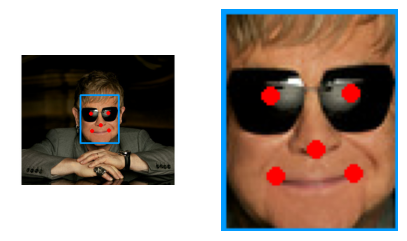

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
axes[0].imshow(image)
axes[0].axis('off')
axes[1].imshow(face)
axes[1].axis('off')
plt.show()

## 2.3 입력형식에 맞게 차원 변환

In [8]:
face.shape

(83, 66, 3)

In [9]:
face_data = np.expand_dims(face, axis=0)
# face_data = face.reshape(-1,83,66,3)
face_data = face[np.newaxis, :]
face_data.shape

(1, 83, 66, 3)

# 3. FaceNet 활용하여 임베딩 데이터로 변환(face_data)
- face_data : 1X83X66X3
- 임베딩 데이터 : 1X512
```
pip install keras-facenet
```

In [10]:
from keras_facenet import FaceNet
model = FaceNet()

## 3.1 이미지 데이터를 FaceNet 임베딩 데이터로 변환

In [11]:
# face_data 얼굴 이미지 이거나 얼굴 특징 데이터가 있는 이미지를 유사성을 축정 할 수 있는 1X512 배열
face_embedding = model.embeddings(face_data)
face_embedding.shape

1/1 [==============================] - 3s 3s/step


(1, 512)

In [12]:
face_embedding[0,:10]

array([-0.00535406,  0.03481748,  0.06170098,  0.12021632,  0.00196333,
        0.04806108, -0.07896575, -0.04746441, -0.0599184 , -0.02178188],
      dtype=float32)

# 4. 분류모델을 만들기 위해서 데이터 셋 생성
- X_train(nX512), y_train(n) * n은 train폴더안의 사진 갯수
- X_test(mX512), y_test(m)   * m은 test폴더안의 사진 갯수
## 4.1 y_train(사람이름)과 X_train에 사용될 이미지 경로(X_train_path)
- y_test(사람이름)과 X_test에 사용될 이미지 경로(x_test_path)

In [29]:
import os
train_path = r'data\5celebrity\train'
test_path = r'data\5celebrity\val'

In [30]:
list(os.walk(train_path))
for path in os.listdir(path=train_path):
    print(path)
    print(os.listdir(path=train_path+'\\'+path))

ben_afflek
['httpcsvkmeuaeccjpg.jpg', 'httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg', 'httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg', 'httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg', 'httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg', 'httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg', 'httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg', 'httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg', 'httptrwebimgacstanetcxbdddmediasnmediajpg.jpg', 'httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg', 'httpwwwallposterscomimagesPostersPFjpg.jpg', 'httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg', 'httpwwwhillsindcomstorebenjpg.jpg', 'httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg']
elton_john
['0.jpg', '1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg'

In [31]:
for x in os.walk(train_path):
    print(x)
    print('---------------------------------')

('data\\5celebrity\\train', ['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling'], [])
---------------------------------
('data\\5celebrity\\train\\ben_afflek', [], ['httpcsvkmeuaeccjpg.jpg', 'httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg', 'httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg', 'httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg', 'httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg', 'httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg', 'httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg', 'httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg', 'httptrwebimgacstanetcxbdddmediasnmediajpg.jpg', 'httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg', 'httpwwwallposterscomimagesPostersPFjpg.jpg', 'httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg', 'httpwwwhillsindcomstorebenjpg.jpg', 'httpwwwrumenewscomwpcontentuploadsbenaffl

In [32]:
def get_path(path):
    x_path = []
    y = []
    for x in os.walk(path):
        if len(x[2])==0:
#             print(x, '에는 파일이 없네요')
            continue
        name = os.path.basename(x[0])
        print(name, '사진', len(x[2]),'장 parsing 중')
        for file_name in x[2]:
#             print(x[0])
            image_full_path = x[0]+'\\'+file_name
            x_path.append(image_full_path)
            y.append(name)
#     print(len(y))
#     print(len(x_path))
#     for name, path in zip(y, x_path):
#         print(name, path)
    return x_path, y

In [33]:
x_train_path, y_train = get_path(train_path)

ben_afflek 사진 14 장 parsing 중
elton_john 사진 16 장 parsing 중
jerry_seinfeld 사진 21 장 parsing 중
madonna 사진 19 장 parsing 중
mindy_kaling 사진 22 장 parsing 중


In [34]:
def get_path_listdir(path):
    x_path = []
    y = []
    for x in os.listdir(path):
        print(x)
        for file_name in os.listdir(path+'/'+x):
            image_full_path = path+'\\'+x+'\\'+file_name
            x_path.append(image_full_path)
            y.append(x)
#     for name, path in zip(y, x_path):
#         print(name, path)
    return x_path, y

In [35]:
# get_path(train_path)
x_train_path, y_train = get_path(train_path)
x_test_path, y_test = get_path(test_path)

ben_afflek 사진 14 장 parsing 중
elton_john 사진 16 장 parsing 중
jerry_seinfeld 사진 21 장 parsing 중
madonna 사진 19 장 parsing 중
mindy_kaling 사진 22 장 parsing 중
ben_afflek 사진 5 장 parsing 중
elton_john 사진 5 장 parsing 중
jerry_seinfeld 사진 5 장 parsing 중
madonna 사진 5 장 parsing 중
mindy_kaling 사진 5 장 parsing 중


In [20]:
len(x_train_path), len(y_train), len(x_test_path), len(y_test)

(92, 92, 25, 25)

In [21]:
for y, x in zip(y_train[::10], x_train_path[::10]):
    print(y, '-', x)

ben_afflek - data\5celebrity\train\ben_afflek\httpcsvkmeuaeccjpg.jpg
ben_afflek - data\5celebrity\train\ben_afflek\httpwwwallposterscomimagesPostersPFjpg.jpg
elton_john - data\5celebrity\train\elton_john\14.jpg
jerry_seinfeld - data\5celebrity\train\jerry_seinfeld\httpgraphicsnytimescomimagessectionmoviesfilmographyWireImagejpg.jpg
jerry_seinfeld - data\5celebrity\train\jerry_seinfeld\httpstatictherichestimagescomcdncwpcontentuploadsJerrySeinfeldjpg.jpg
jerry_seinfeld - data\5celebrity\train\jerry_seinfeld\httpwwwwatchidcomsitesdefaultfilesuploadsightingBreitlingwatchJerrySeinfeldjpg.jpg
madonna - data\5celebrity\train\madonna\httpssmediacacheakpinimgcomxffabffabbbcfbceaedjpg.jpg
mindy_kaling - data\5celebrity\train\mindy_kaling\httpgonetworthcomwpcontentuploadsthumbsjpg.jpg
mindy_kaling - data\5celebrity\train\mindy_kaling\httpssmediacacheakpinimgcomxbbfcbdedfbfdbjpg.jpg
mindy_kaling - data\5celebrity\train\mindy_kaling\httpwwwpictureszimbiocomfpMindyKalingfBgaONVFDFmjpg.jpg


## 4-2 임베딩함수를 통해 전체 학습 이미지를 임베딩 처리한 후 train_X리스트에 저장

In [22]:
def make_embedding(path):
    from mtcnn import MTCNN
    from keras_facenet import FaceNet
    'path의 이미지를 읽는다 -> 얼굴정보만 추출 -> facenet을 통해 임베딩 데이터로 전환'
    # print(path)
    image = cv2.imread(path, cv2.IMREAD_ANYCOLOR) # BGR포맷
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # RGB 포맷의 넘파이 배열
    detector = MTCNN()
    result = detector.detect_faces(image)
    if not result:
        print(path, '의 파일에서는 얼굴을 인지하지 못했습니다')
    #print(result)
    x, y, w, h = result[0]['box']
    # print(x, y, w, h)
    face = image[y:y+h, x:x+w]
    # face 데이터 축 추가
    input_data = np.expand_dims(face, axis=0)
    #print(face.shape, input_data.shape)
    # 임베딩 데이터 전환
    model = FaceNet()
    face_embedding = model.embeddings(input_data)
    return face_embedding

In [23]:
X_train_list = []
for image_full_path in x_train_path:
    face_embedding = make_embedding(image_full_path)
#     print(face_embedding[0])
    X_train_list.append(face_embedding[0])

1/1 [==============================] - 2s 2s/step


In [36]:
X_test_list = []
for image_full_path in x_test_path:
    face_embedding = make_embedding(image_full_path)
    X_test_list.append(face_embedding[0])

1/1 [==============================] - 2s 2s/step


In [38]:
len(X_train_list), len(y_train), len(X_test_list), len(y_test)

(92, 92, 25, 25)

In [40]:
X_train = np.array(X_train_list)
print(X_train.shape)
X_test = np.array(X_test_list)
print(X_test.shape)

(92, 512)
(25, 512)


# 5. SVM(Support Vector Machine) 알고리즘을 이용하여 모델생성

In [41]:
# svm : 분류분석기, 회귀분석기
from sklearn import preprocessing, svm
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

classifier = svm.SVC(kernel='linear', probability=True) # 확률값 출력
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [45]:
y_hat = classifier.predict(X_test) # X_test의 예측값
accuracy = accuracy_score(y_test, y_hat)
print(accuracy*100,'%')

100.0 %


In [46]:
confusion_matrix(y_test, y_hat) # 혼돈행렬

array([[5, 0, 0, 0, 0],
       [0, 5, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 5, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

In [47]:
ctab = pd.crosstab(y_test, y_hat)
ctab

col_0,ben_afflek,elton_john,jerry_seinfeld,madonna,mindy_kaling
row_0,,,,,
ben_afflek,5,0,0,0,0
elton_john,0,5,0,0,0
jerry_seinfeld,0,0,5,0,0
madonna,0,0,0,5,0
mindy_kaling,0,0,0,0,5


# 6. 생성된 모델 사용(예측)하기 

In [56]:
image_path = 'data/test_madonna2.jpg'
face_embedding = make_embedding(image2_path)
print(classifier.predict(face_embedding))
print(classifier.predict_proba(face_embedding))

1/1 [==============================] - 2s 2s/step
['madonna']
[[0.03539949 0.03081324 0.02004434 0.88992389 0.02381905]]


In [55]:
image_path = 'data/test_elton.jpg'
face_embedding = make_embedding(image_path)
classifier.predict(face_embedding)

1/1 [==============================] - 2s 2s/step


array(['elton_john'], dtype='<U14')

# 7. 모델 저장

In [57]:
# SVC 모델은 h5파일로 저장 안됨
import joblib
joblib.dump(classifier, 'model/face_svc.pkl')

['model/face_svc.pkl']

# 8. 모델 불러오기

In [58]:
loaded_model = joblib.load('model/face_svc.pkl')

1/1 [==============================] - 2s 2s/step
['madonna']
[[0.03539949 0.03081324 0.02004434 0.88992389 0.02381905]]


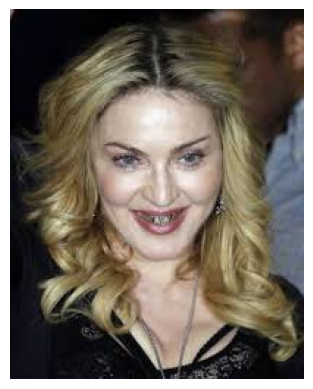

In [60]:
image_path = 'data/test_madonna2.jpg'
face_embedding = make_embedding(image2_path)
print(loaded_model.predict(face_embedding))
print(loaded_model.predict_proba(face_embedding))
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

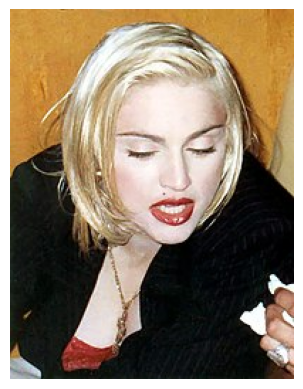

1/1 [==============================] - 2s 2s/step
[[0.09171527 0.03498718 0.05369391 0.75666926 0.06293437]]
madonna


In [72]:
import requests
image_path = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Madonna_1990_cropped.jpg/200px-Madonna_1990_cropped.jpg'
response = requests.get(image_path)
save_path = 'data/test.jpg'
with open(save_path, 'wb') as imageFile:
    imageFile.write(response.content)
image = cv2.imread(save_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()
face_embedding = make_embedding(save_path)
result = loaded_model.predict_proba(face_embedding)
print(result)
names = ['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']
print(names[result.argmax(axis=1)[0]])